In [32]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
clothing = pd.read_csv('Clothing_Customers.csv')

In [34]:
cluster_cols = ['income', 'annual_spend']
clothing[cluster_cols].head()

,income,annual_spend
0,37453,4441
1,50775,4239
2,71047,5834
3,52239,5456
4,112343,1749


In [35]:
clothing[cluster_cols] = scaler.fit_transform(clothing[cluster_cols])

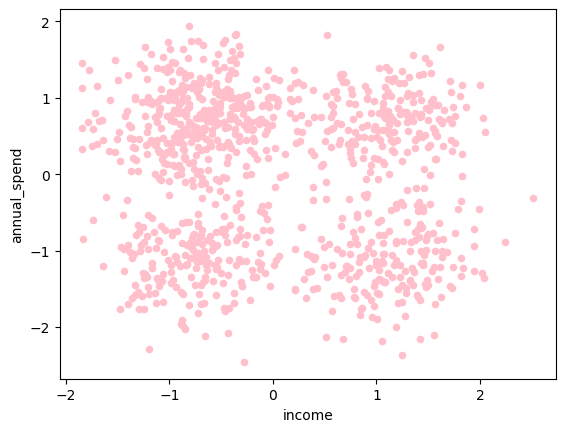

In [36]:
clothing.plot.scatter(x='income', y='annual_spend',
                          color="pink")
plt.show()

In [37]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=42)

In [38]:
model.fit(clothing[cluster_cols])

clothing['Cluster'] = model.predict(clothing[cluster_cols])

c:\Users\sueso\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [39]:
clothing.head()

,income,age,days_since_purchase,annual_spend,Cluster
0,-0.890426,48,504,0.062276,1
1,-0.553094,50,566,-0.058939,1
2,-0.039778,41,326,0.898182,1
3,-0.516023,52,259,0.671353,1
4,1.005897,27,279,-1.553129,0


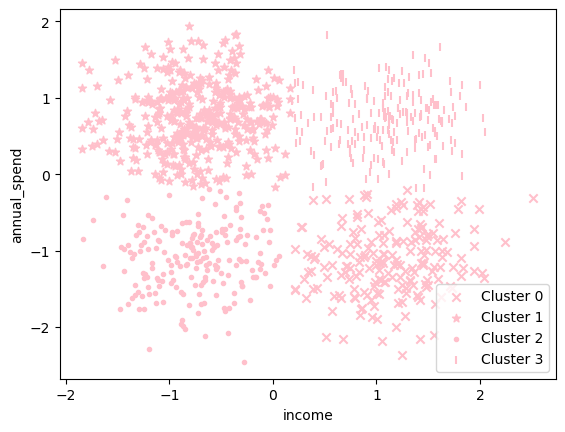

In [40]:
markers = ['x', '*', '.','|']

for clust in range(4):
    temp = clothing[clothing.Cluster == clust]
    plt.scatter(temp.income, temp.annual_spend, \
                marker=markers[clust], \
                color = 'pink',\
                label="Cluster "+str(clust))
plt.xlabel('income')
plt.ylabel('annual_spend')
plt.legend()
plt.show()